# Transferencia de calor.

**Objetivo General**
- Resolver numérica y computacionalmente la ecuación de conducción de calor estacionaria en dos dimensiones usando un método implícito.

**Objetivos particulares**
- Definir los parámetros físicos y numéricos.
- Definir la malla del dominio.
- Definir la temperatura inicial junto con sus condiciones de frontera y graficarla sobre la malla.
- Definir el sistema lineal y resolverlo.
- Graficar la solución.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/">01_transferencia_calor_1.ipynb by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

 **Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101010, PE101922 y PE106525**

In [1]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/sKbanJs-K1I?si=ugXLclpdov-rbogC" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

# Introducción.
**Jean-Baptiste Joseph Fourier**
fue un matemático y físico francés que ejerció una fuerte influencia en la ciencia a través de su trabajo *Théorie analytique de la chaleur*. En este trabajo mostró que es posible analizar la conducción de calor en cuerpos sólidos en términos de series matemáticas infinitas, las cuales ahora llevan su nombre: *Series de Fourier*. Fourier comenzó su trabajo en 1807, en Grenoble, y lo completó en París en 1822. Su trabajo le permitió expresar la conducción de calor en objetos bidimensionales (hojas muy delgadas de algún material) en términos de una ecuación diferencial:


$$
\dfrac{\partial T}{ \partial t} = \kappa \left(\dfrac{\partial^2 T}{ \partial x^2} + \dfrac{\partial^2 T}{ \partial y^2}\right) + S
$$

donde $u$ representa la temperatura en un instante de tiempo $t$ y en un punto $(x,y)$ del plano Cartesiano, $\kappa$ es la conductividad del material y $S$ una fuente de calor.

# Caso estacionario en 2D.

<div>
 <img src="./condCalor2D.png"  hspace="5" vspace="5" style="float: right; width:150px"/>
    Cuando el problema es estacionario, es decir no hay cambios en el tiempo, y el dominio de estudio es una placa en dos dimensiones, como la que se muestra en la figura, podemos escribir el problema como sigue:

$$
- \kappa \left(\dfrac{\partial^2 T}{ \partial x^2} + \dfrac{\partial^2 T}{ \partial y^2}\right) = S \tag{1}
$$
    Podemos aplicar condiciones de frontera de tipo Dirichlet o Neumann en las paredes de la placa.
    En la figura se distingue $T_L, T_R, T_T$ y $T_B$ que corresponden a las temperaturas dadas en las paredes izquierda (LEFT), derecha (RIGHT), arriba (TOP) y abajo (BOTTOM), respectivamente.
</div>

A la ecuación $(1)$ le podemos aplicar el método de diferencias finitas:

<table>
  <tr>
    <td><img src="./malla2D_DF.png"  width='300px'/></td>
      <td>$\Longrightarrow$</td>
    <td>
$$
\begin{eqnarray}
	\frac{\partial^2 T}{\partial x^2}\Big|_{i,j} \approx \frac{T_{i+1,j} - 2 T_{i,j} + T_{i-1,j}}{h_x^2}; \\
	\frac{\partial^2 T}{\partial y^2}\Big|_{i,j} \approx \frac{T_{i,j+1} - 2 T_{i,j} + T_{i,j-1}}{h_y^2}.
\end{eqnarray}
$$      
    </td>
  </tr>
</table>

de tal manera que obtendríamos un sistema de ecuaciones lineales como el siguiente:

<center>
<img src="./calor02.png"  width='500px'/></td>
</center>

En general un sistema de ecuaciones lineales puede contener $n$ ecuaciones con $n$ incógnitas y se ve como sigue:

$$
A \cdot \mathbf{x} = \mathbf{b} \Longrightarrow
\left[
\begin{array}{ccccc}
a_{00} & a_{01} & a_{02} & \dots & a_{0n} \\
a_{10} & a_{11} & a_{12} & \dots & a_{1n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n1} & a_{n2} & \dots & a_{nn}
\end{array} \right] 
\left[
\begin{array}{cccc}
x_{0} \\ x_{1} \\ \vdots \\ x_{n}
\end{array} \right] 
=
\left[
\begin{array}{c}
b_0 \\ b_1 \\ \vdots \\ b_{n}
\end{array}
\right]
$$ 

El sistema se puede resolver usando diferentes tipos de métodos.


## Interactivo

In [1]:
%run "./z_inter_cond_calor_sol.ipynb"

Output()

<div class="alert alert-success">

## Ejercicio 1.
¿Cuántas iteraciones se requieren para resolver el problema para cada método con las siguientes condiciones `Bot=100.0`, `Top = Left = Right = 0.0` y `N = 5`?

Escribe tu respuesta en las siguientes variables:

```python
LU_it = ...
J_it = ...
GS_it = ...
SOR_it = ...
SD_it = ...
CGM_it = ...
```

</div>

In [6]:
#LU_it = ...
#J_it = ...
#GS_it = ...
#SOR_it = ...
#SD_it = ...
#CGM_it = ...

### BEGIN SOLUTION
LU_it = 1
J_it = 117
GS_it = 61
SOR_it = 50
SD_it = 126
CGM_it =11

from macti.eval import FileAnswer

file_ans = FileAnswer()
file_ans.write('1', LU_it, "OJO: LU es in algoritmo directo.")
file_ans.write('2', J_it, "Checa los parámetros en el interactivo y repite la ejecución.")
file_ans.write('3', GS_it, "Checa los parámetros en el interactivo y repite la ejecución.")
file_ans.write('4', SOR_it, "Checa los parámetros en el interactivo y repite la ejecución.")
file_ans.write('5', SD_it, "Checa los parámetros en el interactivo y repite la ejecución.")
file_ans.write('6', CGM_it, "Checa los parámetros en el interactivo y repite la ejecución.")
file_ans.to_file('tallerAF_quiz')
### END SOLUTION

print("{:>12s} = {:3>}".format("LU", LU_it))
print("{:>12s} = {:3>}".format("Jacobi", J_it))
print("{:>12s} = {:3>}".format("Gauss-Seidel", GS_it))
print("{:>12s} = {:3>}".format("SOR", SOR_it))
print("{:>12s} = {:3>}".format("Steepest", SD_it))
print("{:>12s} = {:3>}".format("CGM", CGM_it))

El directorio :/home/jovyan/TallerAF/.ans/ejemplo/ ya existe
Respuestas y retroalimentación almacenadas.
          LU = 1
      Jacobi = 117
Gauss-Seidel = 61
         SOR = 50
    Steepest = 126
         CGM = 11


In [7]:
from macti.eval import Quiz
quiz = Quiz('tallerAF_quiz', 'TallerAF', 'local')

In [8]:
quiz.eval_numeric('1', LU_it)
quiz.eval_numeric('2', J_it)
quiz.eval_numeric('3', GS_it)
quiz.eval_numeric('4', SOR_it)
quiz.eval_numeric('5', SD_it)
quiz.eval_numeric('6', CGM_it)

――――――――――――――――――――――――――――――――――――――――
1 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
2 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
3 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
4 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
5 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
6 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


# Implementación.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import macti.vis as mvis

## Paso 1. Parámetros físicos y numéricos

In [10]:
# Tamaño del dominio
Lx = 1.0       
Ly = 1.0

# Conductividad térmica
k = 1.0       

# Número de nodos en cada eje
Nx = 6         
Ny = 6         

# Número total de incógnitas
Nxi = Nx - 2   
Nyi = Ny - 2  
N = Nxi * Nyi

In [11]:
print('Total de nodos en x = {}, en y = {}'.format(Nx, Ny))
print('Total de incógnitas = {}'.format(N))

Total de nodos en x = 6, en y = 6
Total de incógnitas = 16


## Paso 2. Generación de la malla del dominio

In [12]:
# Tamaño de las celdas de la malla en cada dirección
hx = Lx / (Nx-1) 
hy = Ly / (Ny-1)

# Construcción de la coordenadas de la malla
xn = np.linspace(0, Lx, Nx)
yn = np.linspace(0, Ly, Ny)

# Generación de una rejilla
xg, yg = np.meshgrid(xn, yn, indexing='ij')

print('hx = {}, hy = {}'.format(hx, hy))
print('Coordenadas en x : {}'.format(xn))
print('Coordenadas en y : {}'.format(yn))

hx = 0.2, hy = 0.2
Coordenadas en x : [0.  0.2 0.4 0.6 0.8 1. ]
Coordenadas en y : [0.  0.2 0.4 0.6 0.8 1. ]


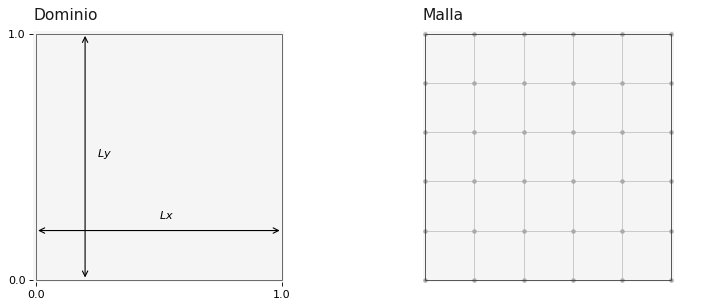

In [13]:
# Graficación del dominio y de la malla.
vis = mvis.Plotter(1,2, [dict(aspect = 'equal') for i in range(2)], dict(figsize=(10,4)))
vis.set_canvas(1, Lx, Ly)
vis.draw_domain(1, xg, yg)
vis.axes(1).set_title('Dominio', fontsize=14)

cax = vis.set_canvas(2, Lx, Ly)
vis.plot_mesh2D(2, xg, yg, nodeson=True)
vis.plot_frame(2, xg, yg, ticks=False)
vis.axes(2).set_title('Malla', fontsize=14)

vis.show()

## Paso 3. Campo de temperaturas y sus condiciones de frontera

In [14]:
# Definición de un campo escalar en cada punto de la malla
T = np.zeros((Nx, Ny))

# Condiciones de frontera
TB = 1.0
TT = -1.0

T[0 , :] = 0.0 # LEFT
T[-1, :] = 0.0 # RIGHT
T[: , 0] = TB  # BOTTOM
T[: ,-1] = TT  # TOP

print('Campo escalar T ({}):\n {}'.format(T.shape, T))

Campo escalar T ((6, 6)):
 [[ 1.  0.  0.  0.  0. -1.]
 [ 1.  0.  0.  0.  0. -1.]
 [ 1.  0.  0.  0.  0. -1.]
 [ 1.  0.  0.  0.  0. -1.]
 [ 1.  0.  0.  0.  0. -1.]
 [ 1.  0.  0.  0.  0. -1.]]


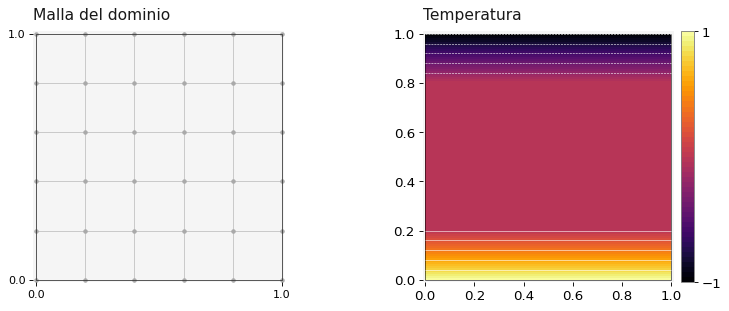

In [15]:
# Graficación de la malla y del campo escalar inicial.

vis = mvis.Plotter(1,2, [dict(aspect = 'equal') for i in range(2)], dict(figsize=(10,4)))
vis.set_canvas(1, Lx, Ly)
vis.plot_mesh2D(1, xg, yg, nodeson=True)
vis.plot_frame(1, xg, yg, ticks=True)
vis.axes(1).set_title('Malla del dominio', fontsize=14)

cax = vis.set_canvas(2, Lx, Ly)
vis.plot_frame(2, xg, yg, ticks=False)
c = vis.contourf(2, xg, yg, T, levels=50, cmap="inferno")
vis.contour(2, xg, yg, T, levels=10, colors='white', linewidths=0.5)
vis.fig.colorbar(c, cax=cax, ticks = [T.min(), T.max()], shrink=0.5, orientation='vertical')
vis.axes(2).set_title('Temperatura', fontsize=14)

vis.show()

## Paso 4. Flujo de calor

Fourier también estableció una ley para el flujo de calor que se escribe como:

$$
\vec{q} = -\kappa \nabla T = -\kappa \left(\dfrac{\partial T}{\partial x}, \dfrac{\partial T}{\partial y}\right)
$$


<div class="alert alert-success">

## Ejercicio 2.
Completa la función `heat_flux(T, hx, hy)` con el cálculo de las derivadas parciales usando diferencias finitas centradas:

$$
\begin{eqnarray}
\dfrac{\partial T}{\partial x} & = & \dfrac{T_{i+1,j} - T_{i-1,j}}{2 * h_x} \\
\dfrac{\partial T}{\partial y} & = & \dfrac{T_{i,j+1} - T_{i,j-1}}{2 * h_y} 
\end{eqnarray}
$$

</div>

In [17]:
def heat_flux(T, hx, hy):
    """
    Calcula el flujo de calor usando la ley de Fourier.

    Parameters
    ----------
    T : ndarray
        Campo escalar de temperaturas.

    hx: float
        Tamaño de las celdas de la malla en la dirección x.

    hy: float
        Tamaño de las celdas de la malla en la dirección y.

    Returns
    -------
    qx, qy: ndarray
        Componentes del vector de flujo.
    """
    Nx, Ny = T.shape
    qx = np.zeros(T.shape)
    qy = qx.copy()

    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            ### BEGIN SOLUTION
            qx[i,j] = -k * (T[i+1,j] - T[i-1,j]) / 2 * hx
            qy[i,j] = -k * (T[i,j+1] - T[i,j-1]) / 2 * hy
            ### END SOLUTION
            #qx[i,j] = ...
            #qy[i,j] = ...
    return qx, qy

In [20]:
# Calculamos el flujo de calor
#qx, qy = heat_flux(...)

### BEGIN SOLUTION
qx, qy = heat_flux(T, hx, hy)

file_ans.write('7', qx, "Checa los parámetros en el interactivo y repite la ejecución.")
file_ans.write('8', qy, "Checa los parámetros en el interactivo y repite la ejecución.")
file_ans.to_file('tallerAF_quiz')
### END SOLUTION

El directorio :/home/jovyan/TallerAF/.ans/ejemplo/ ya existe
Respuestas y retroalimentación almacenadas.


In [22]:
quiz.eval_numeric('7', qx.flatten())
quiz.eval_numeric('8', qy.flatten())

――――――――――――――――――――――――――――――――――――――――
7 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
8 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


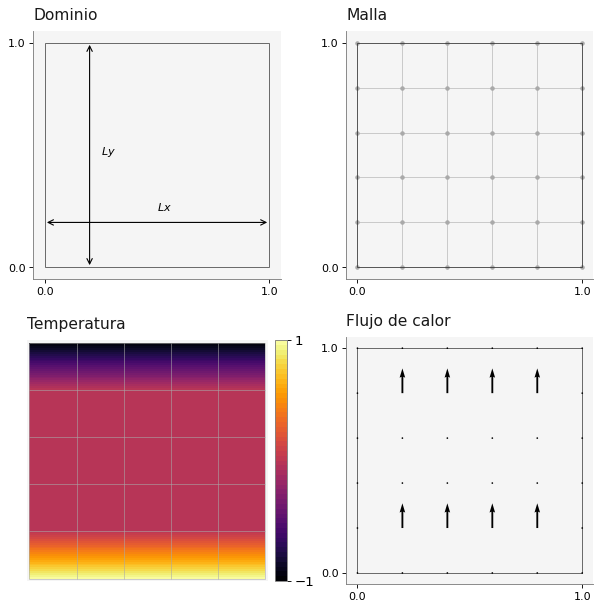

In [11]:
# Graficación de la malla, la temperatura y el flujo de calor.

ax1 = dict(aspect='equal', title='Dominio')
ax2 = dict(aspect='equal', title='Malla')
ax3 = dict(aspect='equal', title='Temperatura')
ax4 = dict(aspect='equal', title='Flujo de calor')

vis = mvis.Plotter(2,2,[ax1, ax2, ax3, ax4],
                  dict(figsize=(8,8)))

vis.draw_domain(1, xg, yg)
vis.plot_mesh2D(2, xg, yg, nodeson=True)
vis.plot_frame(2, xg, yg)

cax3 = vis.set_canvas(3,Lx,Ly)
c = vis.contourf(3, xg, yg, T, levels=50, cmap='inferno')
vis.fig.colorbar(c, cax=cax3, ticks = [T.min(), T.max()], shrink=0.5, orientation='vertical')
vis.plot_mesh2D(3, xg, yg)

vis.plot_frame(4, xg, yg)
vis.quiver(4, xg, yg, qx, qy, scale=1)
vis.show()

## Paso 5. Solución del sistema lineal

In [12]:
import FDM
A = FDM.buildMatrix2D(Nxi, Nyi, -4)
A

array([[-4.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 1., -4.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  1., -4.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  1., -4.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 1.,  0.,  0.,  0., -4.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  1., -4.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  1., -4.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  1., -4.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., -4.,  1.,  0.,  0.,  1.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1., -4.,  1.,  0.,  0.,
         1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0

In [13]:
# RHS
b = np.zeros((Nxi,Nyi))
b[:, 0] -= TB  # BOTTOM
b[:,-1] -= TT  # TOP
b

array([[-1.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  1.]])

El vector del lado derecho debe ser de una sola dimensión:

In [17]:
b.flatten()

array([-1.,  0.,  0.,  1., -1.,  0.,  0.,  1., -1.,  0.,  0.,  1., -1.,
        0.,  0.,  1.])

In [18]:
# Calculamos la solución.
T_temp = np.linalg.solve(A, b.flatten())
T_temp

array([ 0.40909091,  0.11363636, -0.11363636, -0.40909091,  0.52272727,
        0.15909091, -0.15909091, -0.52272727,  0.52272727,  0.15909091,
       -0.15909091, -0.52272727,  0.40909091,  0.11363636, -0.11363636,
       -0.40909091])

In [19]:
T_temp.shape

(16,)

Colocamos la solución en el campo escalar T de manera adecuada

In [20]:
T[1:-1,1:-1] = T_temp.reshape(Nxi, Nyi)
T

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -1.        ],
       [ 1.        ,  0.40909091,  0.11363636, -0.11363636, -0.40909091,
        -1.        ],
       [ 1.        ,  0.52272727,  0.15909091, -0.15909091, -0.52272727,
        -1.        ],
       [ 1.        ,  0.52272727,  0.15909091, -0.15909091, -0.52272727,
        -1.        ],
       [ 1.        ,  0.40909091,  0.11363636, -0.11363636, -0.40909091,
        -1.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -1.        ]])

In [21]:
# Volvemos a calcular el flujo de calor.
qx, qy = heat_flux(T, hx, hy)

## Paso 6. Gráfica de la solución final

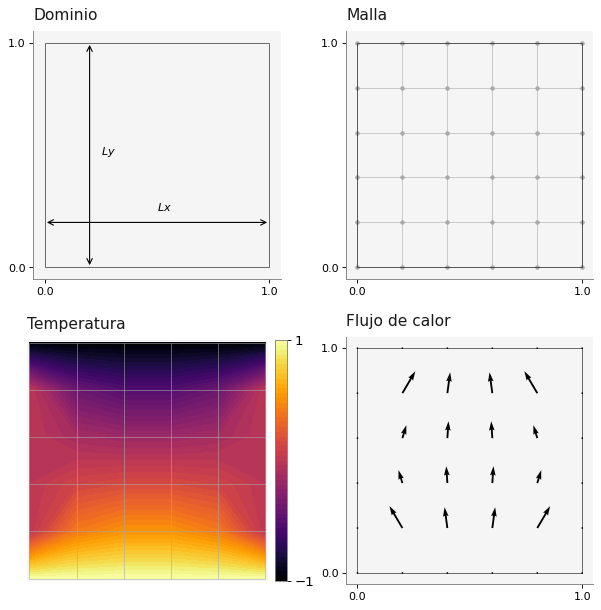

In [22]:
vis = mvis.Plotter(2,2,[ax1, ax2, ax3, ax4],
                  dict(figsize=(8,8)))

vis.draw_domain(1, xg, yg)
vis.plot_mesh2D(2, xg, yg, nodeson=True)
vis.plot_frame(2, xg, yg)

cax3 = vis.set_canvas(3,Lx,Ly)
c = vis.contourf(3, xg, yg, T, levels=50, cmap='inferno')
vis.fig.colorbar(c, cax=cax3, ticks = [T.min(), T.max()], shrink=0.5, orientation='vertical')
vis.plot_mesh2D(3, xg, yg)

vis.plot_frame(4, xg, yg)
vis.quiver(4, xg, yg, qx, qy, scale=1)
vis.show()

## Paso 7. Creación de un interactivo

In [26]:
def heat_cond_solver(Lx, Ly, Nx, Ny):
    """
    Resuelve y grafica la ecuación de calor en una
    placa rectangular.

    Parameters
    ----------
    Lx, Ly: float
        Tamaños del dominio en dirección horizontal y vertical.

    Nx, Ny: int
        Número de nodos en dirección horizontal y vertical.
    """
    # Número total de nodos
    N = Nx * Ny
    
    # Número total de incógnitas
    Nxi = Nx-2
    Nyi = Ny-2
    
    # Tamaño de la malla en cada dirección
    hx = Lx / (Nx-1)
    hy = Ly / (Ny-1)
    
    # Coordenadas de la malla
    xn = np.linspace(0, Lx, Nx)
    yn = np.linspace(0, Ly, Ny)
    
    # Generación de una rejilla
    xg, yg = np.meshgrid(xn, yn, indexing='ij')

    # Definición de un campo escalar en cada punto de la malla
    T = np.zeros((Nx, Ny))
    
    # Condiciones de frontera
    TB = 1.0
    TT = -1.0
    
    T[0 , :] = 0.0 # LEFT
    T[-1, :] = 0.0 # RIGHT
    T[: , 0] = TB  # BOTTOM
    T[: ,-1] = TT  # TOP

    # La matriz del sistema. Usamos la función predefinida buildMatrix2D()
    A = FDM.buildMatrix2D(Nxi, Nyi, -4)

    # RHS
    b = np.zeros((Nxi, Nyi))
    b[:, 0] -= TB  # BOTTOM
    b[:,-1] -= TT  # TOP

    # Calculamos la solución.
    T[1:-1,1:-1] = np.linalg.solve(A, b.flatten()).reshape(Nxi, Nyi)

    # Calculamos el flujo de calor
    qx, qy = heat_flux(T, hx, hy)

    ax1 = dict(aspect='equal', title='Dominio')
    ax2 = dict(aspect='equal', title='Malla')
    ax3 = dict(aspect='equal', title='Temperatura')
    ax4 = dict(aspect='equal', title='Flujo de calor')

    # Graficación de los resultados
    vis = mvis.Plotter(2,2,[ax1, ax2, ax3, ax4],
                      dict(figsize=(8,8)))
    
    vis.draw_domain(1, xg, yg)
    vis.plot_mesh2D(2, xg, yg, nodeson=True)
    vis.plot_frame(2, xg, yg)
    
    cax3 = vis.set_canvas(3,Lx,Ly)
    c = vis.contourf(3, xg, yg, T, levels=50, cmap='inferno')
    vis.fig.colorbar(c, cax=cax3, ticks = [T.min(), T.max()], shrink=0.5, orientation='vertical')
    vis.plot_mesh2D(3, xg, yg)
    
    vis.plot_frame(4, xg, yg)
    vis.quiver(4, xg, yg, qx, qy, scale=1)
    vis.show()

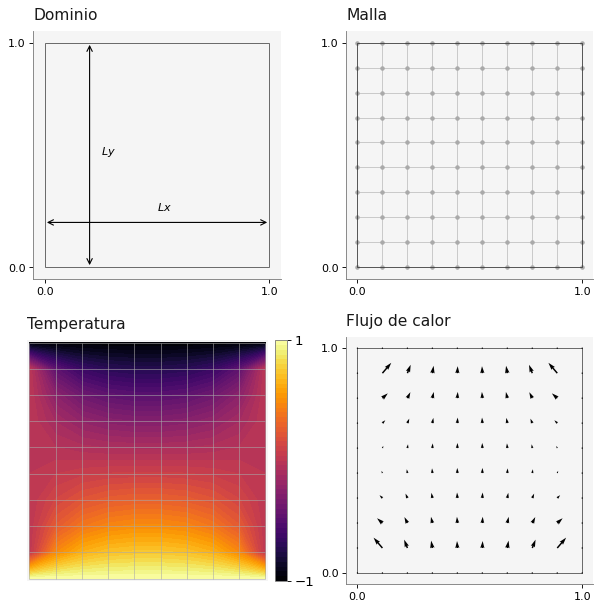

In [27]:
# Prueba de la función 
heat_cond_solver(Lx=1, Ly=1, Nx=10, Ny=10)

In [28]:
import ipywidgets as widgets

In [30]:
widgets.interact(heat_cond_solver, Lx = (1,3,1), Ly = (1,3,1), Nx = (4, 8, 1), Ny = (4, 8, 1))

interactive(children=(IntSlider(value=2, description='Lx', max=3, min=1), IntSlider(value=2, description='Ly',…

<function __main__.heat_cond_solver(Lx, Ly, Nx, Ny)>